In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Averiguar el número de filas totales y columnas

In [5]:
df.shape

(891, 12)

Limpieza de datos.
Averiguar los datos que tenemos para jugar/trabajar

In [6]:
#df.info()
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Me interesa limpiar los datos de Age y Cabin
Necesito poner como valor a Age: 0 y a Cabin: CNada y a Embarked: J

In [7]:
df = df.fillna({"Age": 0, "Cabin": 'CNada', "Embarked": 'J'})
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

Agrupar por Géneros/Sex

In [8]:
df_generos = df.groupby("Sex")
df_generos.describe()

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    314.0  0.742038  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                          
              25%   50%    75%       max  
Sex                                       
female  12.071875  23.0  55.00  512.3292  
male     7.895800  10.5  26.55  512.3292  

[2 rows x 56 columns]

Vamos a extraer los datos con información en variables
Quiero primero, con un triste print, mostrar el número de pasajeros totales

In [16]:
pasajeros = df.shape[0]
supervivientes = df[df.Survived == 1]
num_survived = supervivientes.shape[0]
#len(supervivientes)
fallecidos = df.query("Survived == 0")
num_fallecidos = fallecidos.shape[0]
print(f"Número de pasajeros: {pasajeros}")
print(f"Supervivientes: {num_survived}")
print(f"Fallecidos: {num_fallecidos}")

Número de pasajeros: 891
Supervivientes: 342
Fallecidos: 549


Almacenar los datos que tenemos dentro de un Diccionario

In [17]:
data = {
    'Datos': ['Pasajeros totales', 'Supervivientes', 'Fallecidos']
    , 'Valores': [pasajeros, num_survived, num_fallecidos]
        }
df_estadistica = pd.DataFrame.from_dict(data)
df_estadistica

,Datos,Valores
0,Pasajeros totales,891
1,Supervivientes,342
2,Fallecidos,549


Creamos un gráfico de Pie con el DataFrame de estadística.
Para mostrar los datos, agrupamos por la columna llamada Datos

<Axes: ylabel='Valores'>

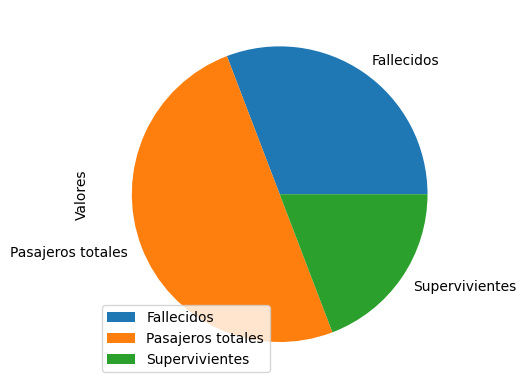

In [19]:
df_grafico = df_estadistica.groupby('Datos').sum()
df_grafico.plot(kind='pie', y='Valores')